In [1]:
options(warn=-1)

In [2]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(grafify)
library(patchwork)
library(facefuns)
library(ggiraphExtra)
library(RColorBrewer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#### Figure 7A

In [3]:
center_scale <- function(x) {
    scale(x, scale = TRUE)
}

spc <- read.csv('/Users/lindan/Dropbox/PhD/Projects/PLF/FTIR/Data/JM006_spc.csv', sep = ",", header = T, row.names = 1)
names(spc) <- gsub("^X", "", names(spc))

spc_s <- spc %>% filter(disease == 1)
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered <- t(center_scale(t(spc_filtered))) %>% as.data.frame()
maha <- mahalanobis(spc_filtered, colMeans(spc_filtered), cov(spc_filtered), inverted = TRUE)
spc_filtered$mahal <- list(maha)[[1]]
spc_filtered$p <- pchisq(spc_filtered$mahal, df=486, lower.tail=FALSE)
spc_filtered$outlier <- ifelse(spc_filtered$mahal > 5*sd(spc_filtered$mahal), 1, 0)
spc_filtered$vial <- spc_s$vial
spc_filtered$disease <- spc_s$disease
spc_filtered_d_id <- spc_filtered %>% filter(outlier == 1)
spc_filtered_d_id <- spc_filtered_d_id$vial

spc_s <- spc %>% filter(disease == 0)
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered <- t(center_scale(t(spc_filtered))) %>% as.data.frame()
maha <- mahalanobis(spc_filtered, colMeans(spc_filtered), cov(spc_filtered), inverted = TRUE)
spc_filtered$mahal <- list(maha)[[1]]
spc_filtered$p <- pchisq(spc_filtered$mahal, df=486, lower.tail=FALSE)
spc_filtered$outlier <- ifelse(spc_filtered$mahal > 5*sd(spc_filtered$mahal), 1, 0)
spc_filtered$vial <- spc_s$vial
spc_filtered$disease <- spc_s$disease
spc_filtered_h_id <- spc_filtered %>% filter(outlier == 1)
spc_filtered_h_id <- spc_filtered_h_id$vial

spc_filtered_id <- c(spc_filtered_d_id, spc_filtered_h_id)

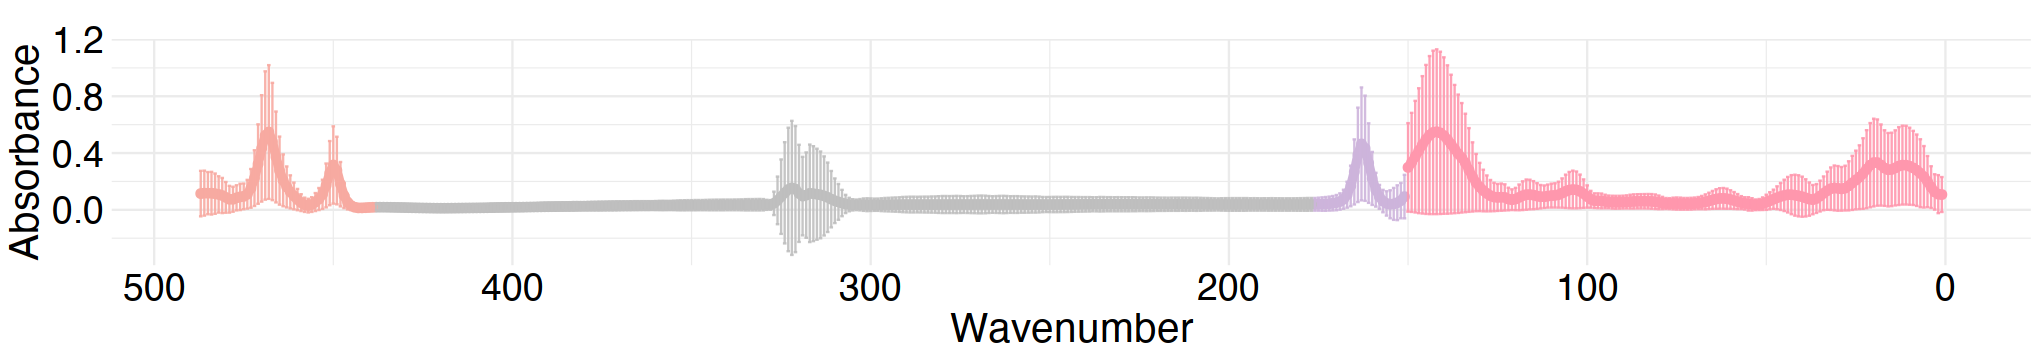

In [5]:
main_theme = theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 22, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 22), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 24), 
    axis.title.x = element_text(face = "bold", size = 24, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) 

spc_s <- spc
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered <- t(center_scale(t(spc_filtered))) %>% as.data.frame()
spc_filtered$vial <- spc_s$vial
spc_filtered <- cbind(spc_filtered, spc_s[,937:953])
spc_filtered <- spc_filtered %>% filter(!vial %in% spc_filtered_id)

spc_filtered_d <- spc_filtered %>% filter(disease == 1)
spc_filtered_d <- spc_filtered_d[,1:487]

spc_filtered_h <- spc_filtered %>% filter(disease == 0)
spc_filtered_h <- spc_filtered_h[,1:487]
spc_filtered_h <- spc_filtered_h[sample(1:nrow(spc_filtered_h), nrow(spc_filtered_d)),]

differences <- abs(spc_filtered_h - spc_filtered_d)
mean_diff <- colMeans(differences)
sd_diff <- apply(differences, 2, sd)

differences <- data.frame(spc = c(as.numeric(colnames(spc_filtered_d))), mean = c(mean_diff), sd = c(sd_diff))
differences <- differences[!(as.numeric(rownames(differences)) > 1585 & as.numeric(rownames(differences)) < 1700), ]
differences$region <- 'R4'
differences <- differences %>% mutate(region = ifelse(spc > 2810 & spc < 3000, "R1", region))
differences <- differences %>% mutate(region = ifelse(spc > 1700 & spc < 1800, "R2", region))
differences <- differences %>% mutate(region = ifelse(spc > 1000 & spc < 1585, "R3", region))
differences <- differences %>% mutate(region = ifelse(spc > 1800 & spc < 2800, "R4", region))
differences$region <- factor(differences$region, levels=c('R1', 'R4', 'R2', 'R3'))
differences$rank <- seq(1, 487)
options(repr.plot.width=17, repr.plot.height=3)
pd <- position_dodge(0.1)
ggplot(differences, aes(x=rank, y=mean, color=region)) + 
   geom_line(position=pd, size = 2) +
   geom_point(position=pd, size=2) +
   geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=1, alpha = 0.9) +
    scale_color_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    main_theme

#### Figure 7B

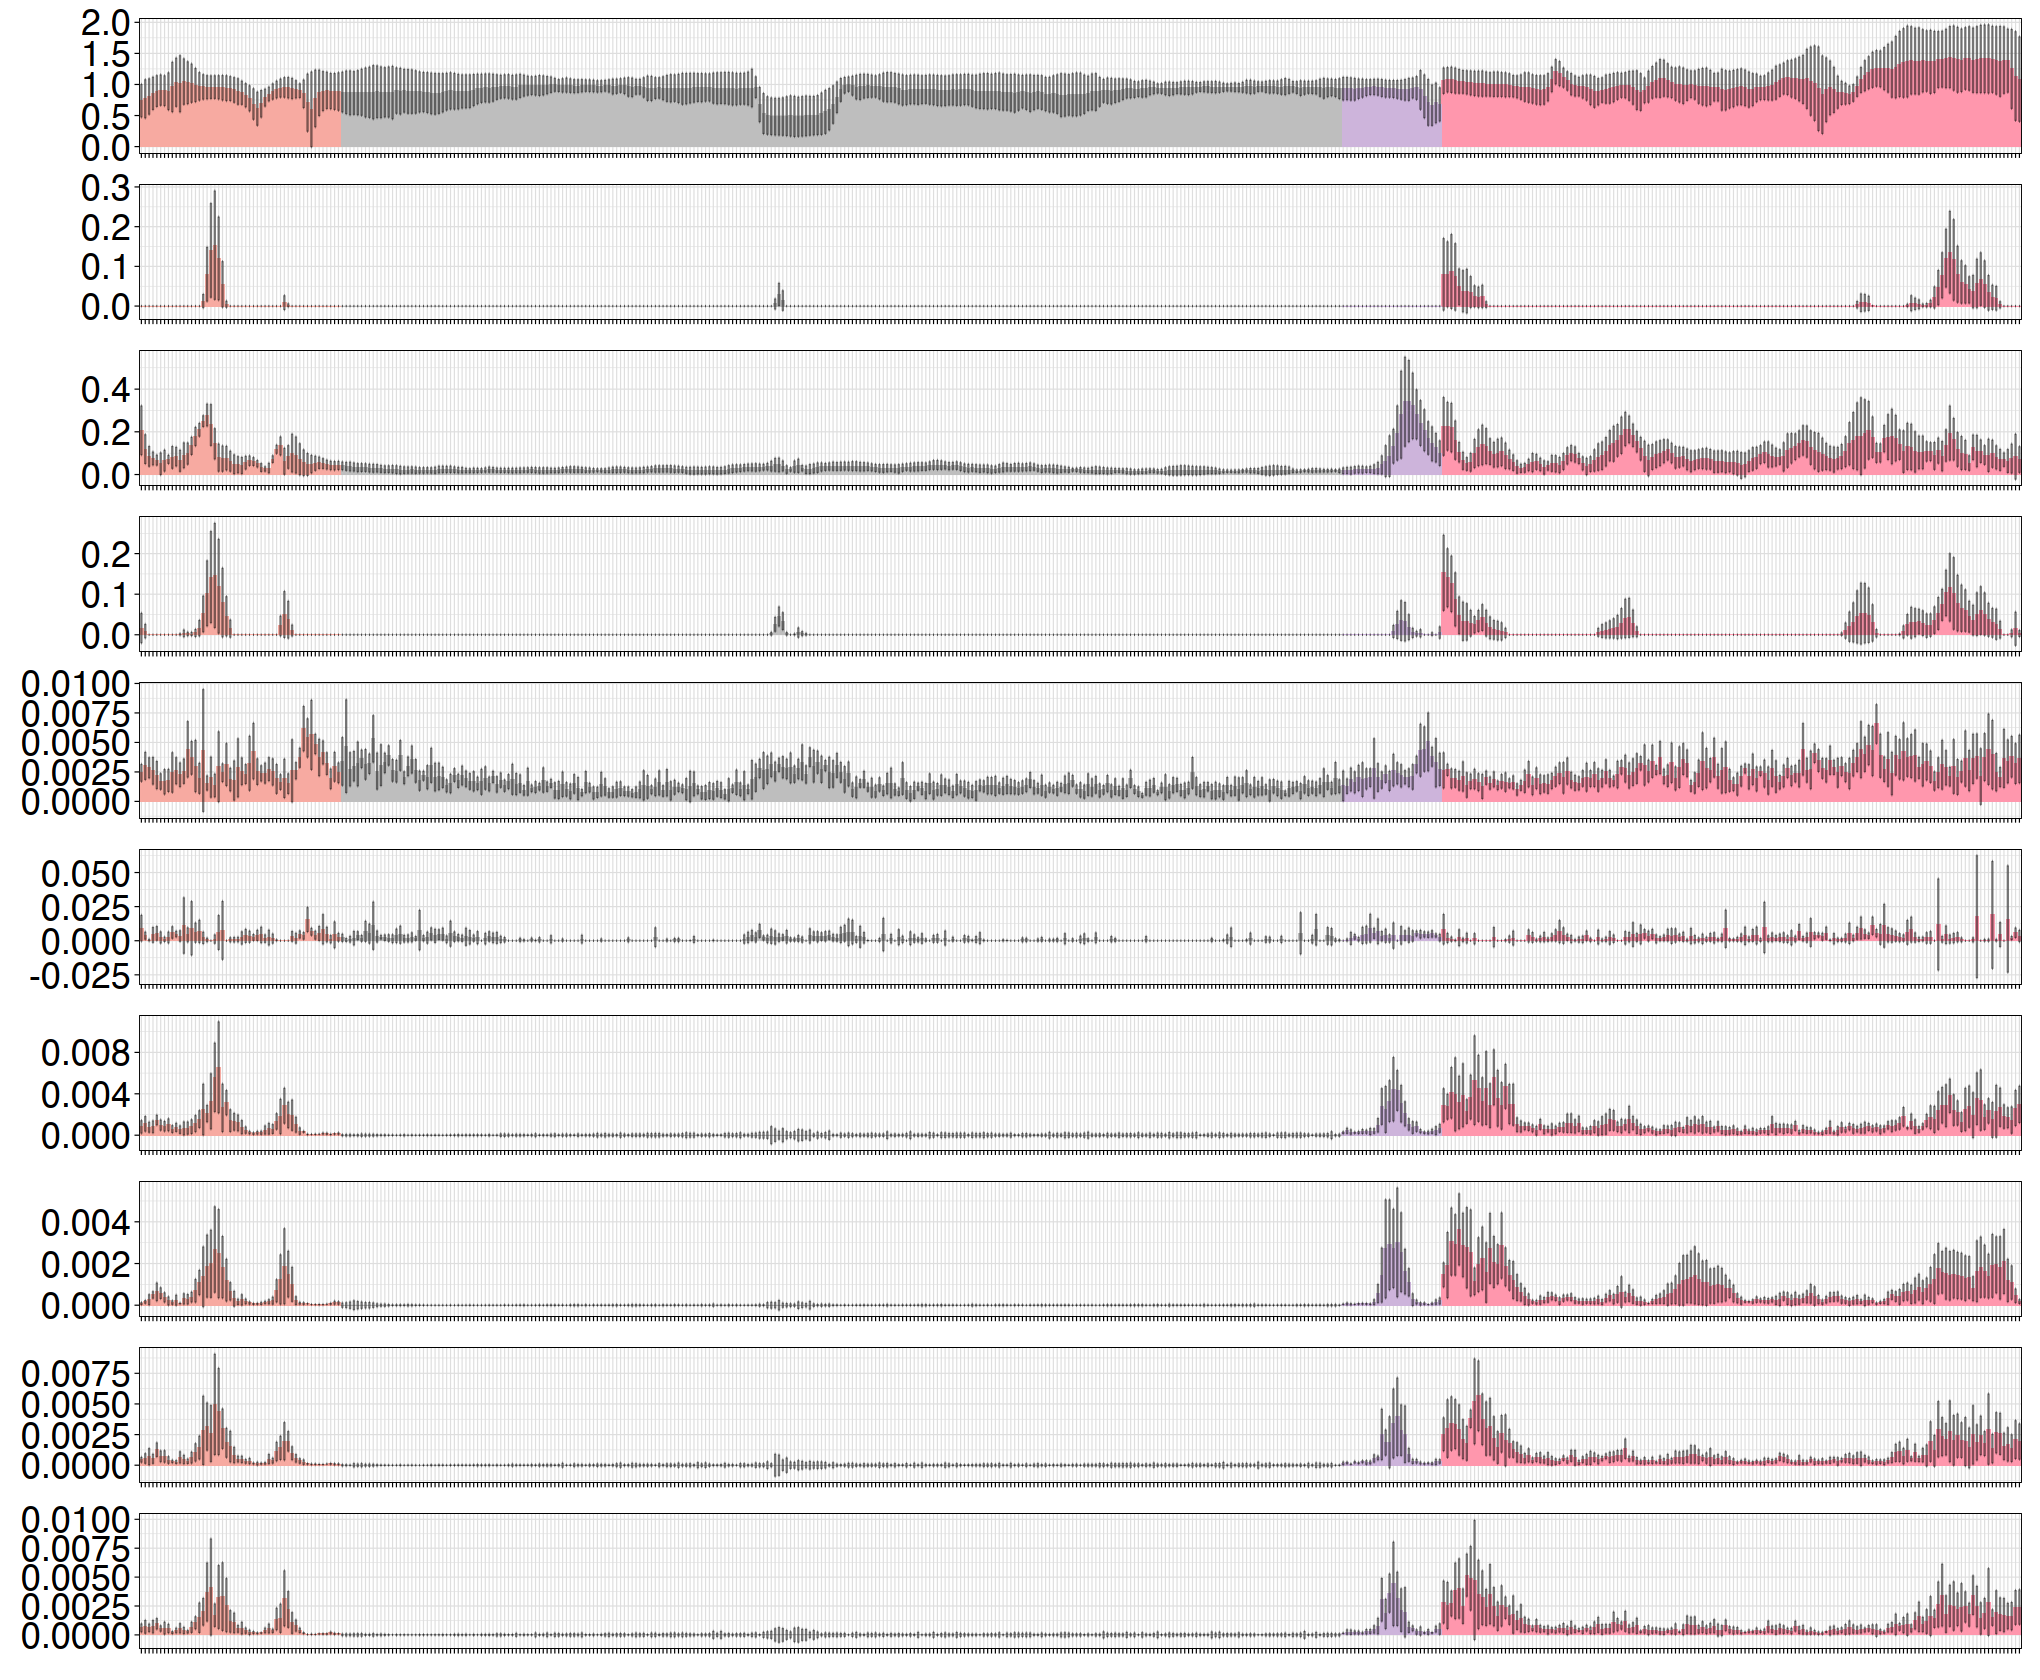

In [6]:
main_theme = theme_light() +
  theme(legend.position = "none",
        plot.title = element_text(size = 22),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 21),
        axis.text.x = element_text(color = "black", size = 0),
        panel.border = element_rect(colour = "black", fill = NA, size = 0.2)) 

data <- read.csv('/Users/lindan/Downloads/imp1.csv', sep = ",", header = T, row.names = NULL)

data_imp <- data %>% filter(model == 'PLS-DA')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'PLS-DA'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p1 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'Lasso')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'Lasso'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p2 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'Ridge')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'Ridge'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p3 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'EN')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'EN'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p4 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'RF')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'RF'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p5 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'XGBoost')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'XGBoost'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p6 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'MLP')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'MLP'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p7 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'CNN')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'CNN'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p8 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'LSTM')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'LSTM'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p9 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'GRU')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'GRU'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p10 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
  geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

options(repr.plot.width=17, repr.plot.height=14)
p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9 + p10 + plot_layout(nrow = 10)

#### Figure 7C

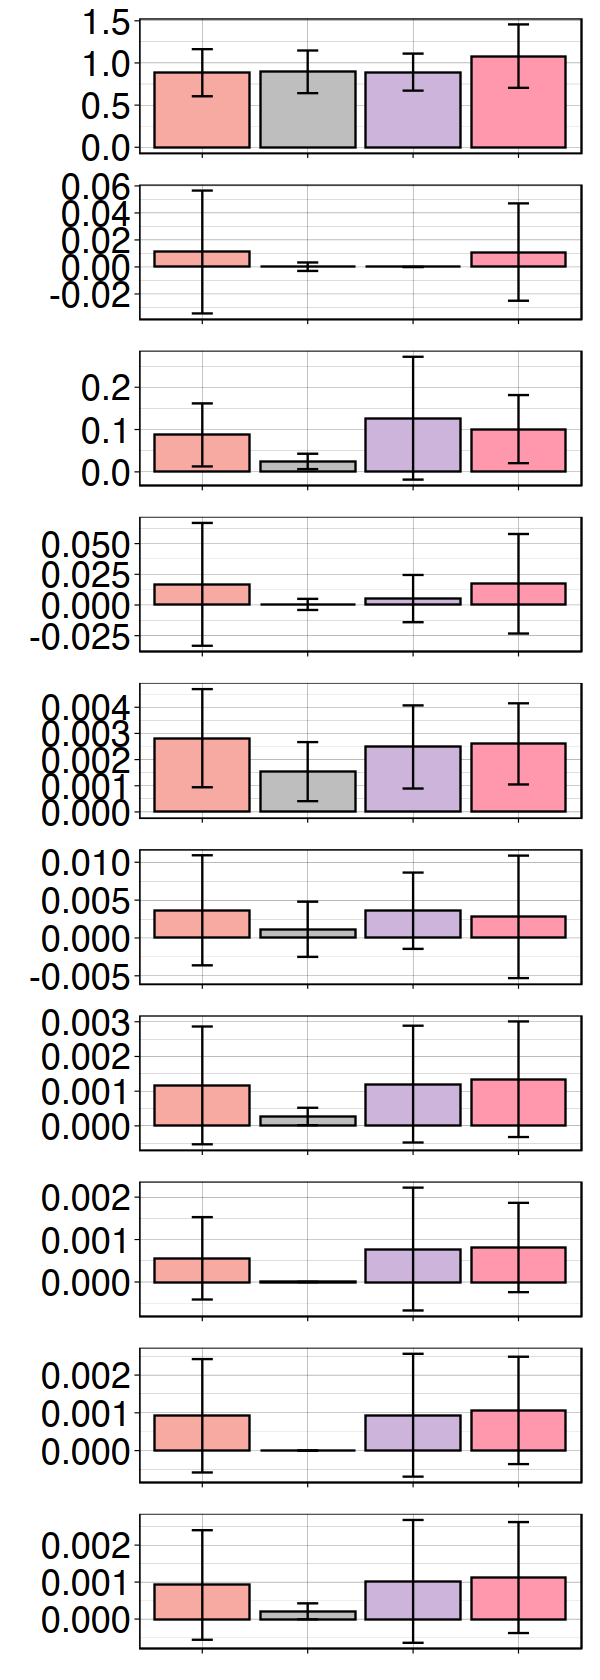

In [7]:
main_theme = theme_linedraw() +
  theme(legend.position = "none",
        plot.title = element_text(size = 22),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 21),
        axis.text.x = element_text(color = "black", size = 0)) 

data <- read.csv('/Users/lindan/Downloads/imp1.csv', sep = ",", header = T, row.names = NULL)

data_imp_sp <- data %>% filter(model == 'PLS-DA')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p1 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'Lasso')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p2 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'Ridge')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p3 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'EN')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p4 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'RF')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p5 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'XGBoost')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p6 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'MLP')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p7 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'CNN')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p8 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'LSTM')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p9 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'GRU')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p10 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

options(repr.plot.width=5, repr.plot.height=14)
p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9 + p10 + plot_layout(nrow = 10)